In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from scipy.stats import skew

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\Untitled.xlsx')

In [3]:
df

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


In [4]:
df[['salary','sales']].describe()

,salary,sales
count,209.000000,209.000000
mean,1281.119617,6923.793282
std,1372.345308,10633.271088
min,223.000000,175.199997
25%,736.000000,2210.300049
50%,1039.000000,3705.199951
75%,1407.000000,7177.000000
max,14822.000000,97649.898438


In [5]:
df.sales.var()


113066454.03946956

In [6]:
import math
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / n

def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev
stdev(df.sales.values)

10607.802139043642

In [7]:
def Skew(data):
    n = len(data)
    Mean = sum(data)/n
    std=data.std()
    Median=np.median(data)
    Skew = sum((x-Mean)**3 for x in data)/((n-1)*std**3) 
    return Skew
One=pd.DataFrame(data={
    'calculation':['Count',"Min","Max","Median",'Mean','variance','standard deviation',],
    'Sales':[len(df.sales),df.sales.min(),df.sales.max(),np.median(df.sales.values),df.sales.mean(),df.sales.values.var(),df.sales.std()],
    'Salary':[len(df.salary),df.salary.min(),df.salary.max(),np.median(df.salary.values),df.salary.mean(),df.salary.var(),df.salary.std()]


})
One.round({"Sales":0 ,"Salary":0})

,calculation,Sales,Salary
0,Count,209.0,209.0
1,Min,175.0,223.0
2,Max,97650.0,14822.0
3,Median,3705.0,1039.0
4,Mean,6924.0,1281.0
5,variance,112525466.0,1883332.0
6,standard deviation,10633.0,1372.0


In [8]:
df.salary.var()

1883331.6442767757

In [9]:
Skew(df.sales),Skew(df.salary)

(4.987150702176867, 6.838504297932583)

In [10]:
skew(df.sales)

4.999124670678251

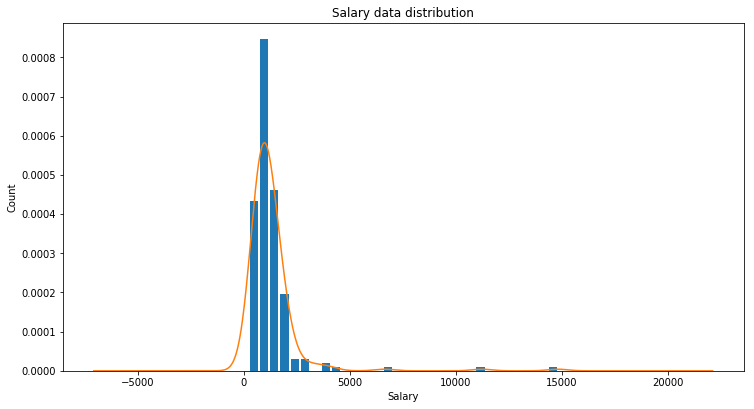

In [11]:
plt.figure(figsize=(12.2,6.4))
plt.hist(df.salary,bins=30,rwidth=0.8,density=True,)
df['salary'].plot(kind = 'density')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary data distribution')
plt.savefig('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\1.png',bbox_inches='tight',pad_nches=2,transperent=True)
plt.show()


In [12]:
x=df.salary
y=df.sales

In [13]:
Test=pd.DataFrame(data={
    'values':[0,2000,4000,6000,8000,10000,12000,14000],
})
Test

,values
0,0
1,2000
2,4000
3,6000
4,8000
5,10000
6,12000
7,14000


In [14]:
x=df.salary
y=df.sales
x2=sm.add_constant(x)
model=sm.OLS(y,x2).fit()
reg= linear_model.LinearRegression()
mod=reg.fit(df[['salary']].values,df['sales'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.018
Date:                Mon, 04 Jul 2022   Prob (F-statistic):             0.0838
Time:                        22:01:14   Log-Likelihood:                -2232.3
No. Observations:                 209   AIC:                             4469.
Df Residuals:                     207   BIC:                             4475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5733.9170   1002.477      5.720      0.000    3757.543    7710.291
salary         0.9288      0.535      1.737      0.084      -0.125       1.983
==============================================================================
Omnibus:                      249.315   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10229.127
Skew:                           4.995   Prob(JB):                         0.00
Kurtosis:                      35.785   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
a=5733.9170
b=0.9288
x1=4000
y1=a+b*x1
y1

9449.117

In [16]:
model.predict([1,4000])

array([9449.03084303])

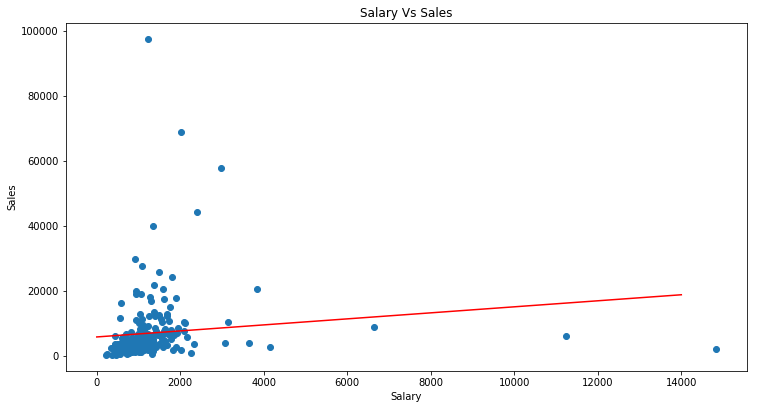

In [17]:
plt.figure(figsize=(12.2,6.4))
plt.scatter(x=x,y=y)
plt.plot(np.array(Test.values),mod.predict(Test.values),color='red')
plt.xlabel('Salary')
plt.ylabel('Sales')
plt.title('Salary Vs Sales')
plt.savefig('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\2.png',bbox_inches='tight',pad_nches=2,transperent=True)

plt.show()

In [21]:
IQR_for_salary=IQR1

In [22]:
#for salary
Q1=df.salary.quantile(0.25)
Q2=df.salary.quantile(0.75)
IQR1=Q2-Q1
IQR1

671.0

In [23]:
lower_limit_salary =Q1-1.5*IQR_for_salary
upper_limit_salary =Q2+1.5*IQR_for_salary
lower_limit_salary,upper_limit_salary

(-270.5, 2413.5)

In [24]:
#for sales
#for salary
Q3=df.sales.quantile(0.25)
Q4=df.sales.quantile(0.75)
IQR2=Q4-Q3

In [25]:
#Given
IQR_for_sales=IQR2

In [26]:
lower_limit_sales =Q3-1.5*IQR_for_sales
upper_limit_sales =Q4+1.5*IQR_for_sales
lower_limit_sales,upper_limit_sales

(-5239.7498779296875, 14627.049926757812)

In [27]:
df1=df[(df.salary<lower_limit_salary)|(df.salary>upper_limit_salary)]
df2=df[(df.sales<lower_limit_sales)|(df.sales>upper_limit_sales)]
len(df1),len(df2)

(9, 21)

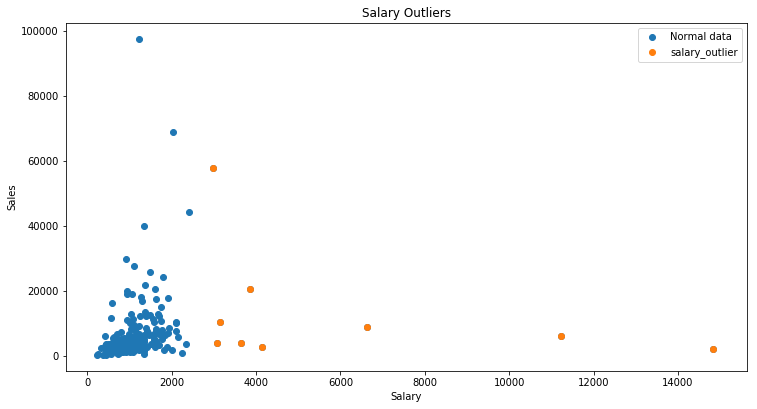

In [28]:
plt.figure(figsize=(12.2,6.4))
plt.scatter(x=x,y=y,label='Normal data')
plt.scatter(x=df1.salary,y=df1.sales,label='salary_outlier')
#plt.scatter(x=df2.salary,y=df2.sales,label='sales_outlier')
plt.xlabel('Salary')
plt.ylabel('Sales')
plt.title('Salary Outliers')
plt.legend()
plt.savefig('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\5.png',bbox_inches='tight',pad_nches=2,transperent=True)

plt.show()

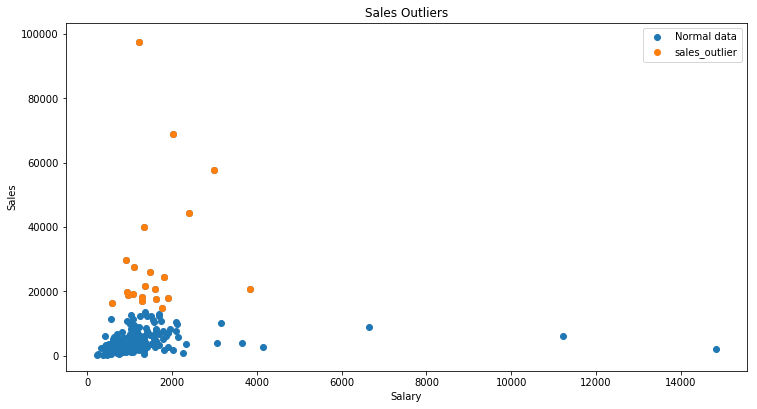

In [29]:
plt.figure(figsize=(12.2,6.4))
plt.scatter(x=x,y=y,label='Normal data')
#plt.scatter(x=df1.salary,y=df1.sales,label='salary_outlier')
plt.scatter(x=df2.salary,y=df2.sales,label='sales_outlier')
plt.xlabel('Salary')
plt.ylabel('Sales')
plt.title('Sales Outliers')
plt.legend()
plt.savefig('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\6.png',bbox_inches='tight',pad_nches=2,transperent=True)
plt.show()

In [30]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

#calculate Coefficient of variation for each column in data frame
print(df[['roe','ros']].apply(cv))
print('ROE is more consistant than ROS')

roe     49.571720
ros    110.312021
dtype: float64
ROE is more consistant than ROS


In [31]:
df.roe.std()/df.roe.mean()

0.4957171966958476

In [32]:
df.ros.std()/df.ros.mean()

1.1031202130603828